In [2]:

key ="2201050767bb417f928e06c7166304c6b41e485d"
b_key ="641DEDB0-361B-441D-BF2E-215378D97EB4"
from census import Census
from us import states
%matplotlib inline
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
pd.options.mode.chained_assignment = None 
import os
import requests
import urllib.request, json 
import pybea
from scipy.stats import norm
from matplotlib.ticker import PercentFormatter
matplotlib.style.use('ggplot')


c = Census(key)

In [3]:
rural = pd.read_excel("final_rural.xlsx")
mrural = pd.read_excel("final_mrural.xlsx")
urban = pd.read_excel("final_urban.xlsx")
urban.head()

,geo_id,Median Age,Median Age ME,Population,White,Black,Native American,Asian,Native Hawaiian,Other,...,under_18,LAUS Code,S_Code,Code,County Name/State Abbreviation,Period,Force,Employed,Unemployed,unemployment_rate
12,1001,37.8,0.5,55049,41663,10113,226,444,6,123,...,13853,CN0100100000000,1,1,"Autauga County, AL",Jun-18,26504,25309,1195,4.5
26,1003,42.3,0.3,199510,165950,18406,1228,1325,0,305,...,44270,CN0100300000000,1,3,"Baldwin County, AL",Jun-18,98459,94288,4171,4.2
40,1015,39.1,0.4,115883,84592,23561,229,1079,6,27,...,25641,CN0101500000000,1,15,"Calhoun County, AL",Jun-18,47029,44279,2750,5.8
54,1017,43.1,0.3,34018,19303,13770,78,312,0,17,...,7283,CN0101700000000,1,17,"Chambers County, AL",Jun-18,15396,14646,750,4.9
68,1031,39.3,0.4,50991,36393,8671,421,623,0,5,...,12122,CN0103100000000,1,31,"Coffee County, AL",Jun-18,20814,19754,1060,5.1


In [4]:

len(rural)

703

Text(0.5,0,'Age Distribution')

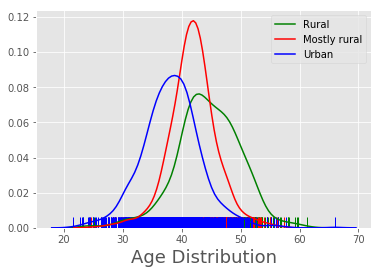

In [5]:
fig, ax = plt.subplots()

sns.distplot(rural["Median Age"],hist=False, rug=True, ax=ax, color='g', label="Rural");
sns.distplot(mrural["Median Age"],hist=False, rug=True, ax=ax, color='r', label="Mostly rural");
sns.distplot(urban["Median Age"],hist=False, rug=True, ax=ax, color='b', label="Urban");
plt.xlabel('Age Distribution', fontsize=18)

Text(0.5,0,'Foreign Born Percentage')

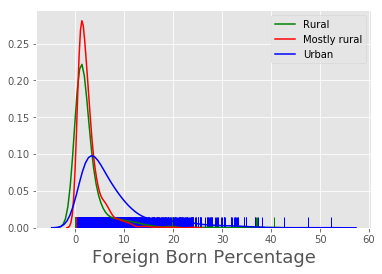

In [6]:
rural["fbp"] = 100 * rural["Foreign Born"]/rural["Population"]
mrural["fbp"] = 100 *mrural["Foreign Born"]/mrural["Population"]
urban["fbp"] = 100 * urban["Foreign Born"]/urban["Population"]
fig, ax = plt.subplots()

sns.distplot(rural["fbp"],hist=False, rug=True, ax=ax, color='g', label="Rural");
sns.distplot(mrural["fbp"],hist=False, rug=True, ax=ax, color='r', label="Mostly rural");
sns.distplot(urban["fbp"],hist=False, rug=True, ax=ax, color='b', label="Urban");
plt.xlabel('Foreign Born Percentage', fontsize=18)

In [7]:
r_mean= rural["agg_travel_time"]/rural["work_time"]
m_mean = mrural["agg_travel_time"]/mrural["work_time"]
u_mean = urban["agg_travel_time"]/urban["work_time"]
df = pd.DataFrame(u_mean)
m_mean.isnull().sum()


33

In [8]:
r_mean = r_mean.dropna()
m_mean = m_mean.dropna()
u_mean = u_mean.dropna()

Text(0.5,0,'Mean Work Time')

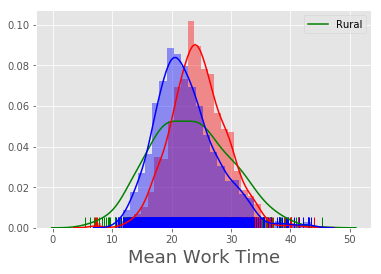

In [159]:

fig, ax = plt.subplots()
sns.distplot(r_mean,hist=False, rug=True, ax=ax, color='g', label="Rural");

sns.distplot(m_mean,hist=True, rug=True, ax=ax, color='r', label="Mostly rural");
sns.distplot(u_mean,hist=True, rug=True, ax=ax, color='b', label="Urban");
plt.xlabel('Mean Work Time', fontsize=18)

In [10]:
rural.columns

Index(['geo_id', 'Median Age', 'Median Age ME', 'Population', 'White', 'Black',
       'Native American', 'Asian', 'Native Hawaiian', 'Other', 'Multiple',
       'Hispanic', 'Foreign Born', 'Foreign Born ME', 'Child Poverty Ratio',
       'total_ed', 'below_hs', 'hs_grad', 'some_college', 'bachelor_deg',
       'graduate_deg', 'Poor', 'agg_travel_time', 'work_time', 'under5',
       'five', 'ten', 'fifteen', 'twenty', 'twenty5', 'thirty', 'thirty5',
       'fourty', 'fourty5', 'sixty', 'ninety', 'h_above_poverty',
       'Median Household Income', 'acs_laborf', 'acs_unemployed', 'Name',
       'County', 'State', 'under_18', 'LAUS Code', 'S_Code', 'Code',
       'County Name/State Abbreviation', 'Period', 'Force', 'Employed',
       'Unemployed', 'unemployment_rate', 'fbp'],
      dtype='object')

Text(0.5,0,'Hispanic')

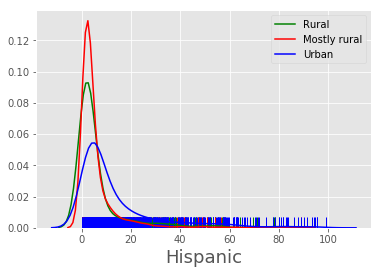

In [11]:
r_his = 100 * rural["Hispanic"]/ rural["Population"]
m_his = 100 *mrural["Hispanic"]/ mrural["Population"]
u_his = 100 * urban["Hispanic"]/ urban["Population"]
fig, ax = plt.subplots()

sns.distplot(r_his,hist=False, rug=True, ax=ax, color='g', label="Rural");
sns.distplot(m_his,hist=False, rug=True, ax=ax, color='r', label="Mostly rural");
sns.distplot(u_his,hist=False, rug=True, ax=ax, color='b', label="Urban");
plt.xlabel('Hispanic', fontsize=18)


c:\users\gabriel\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


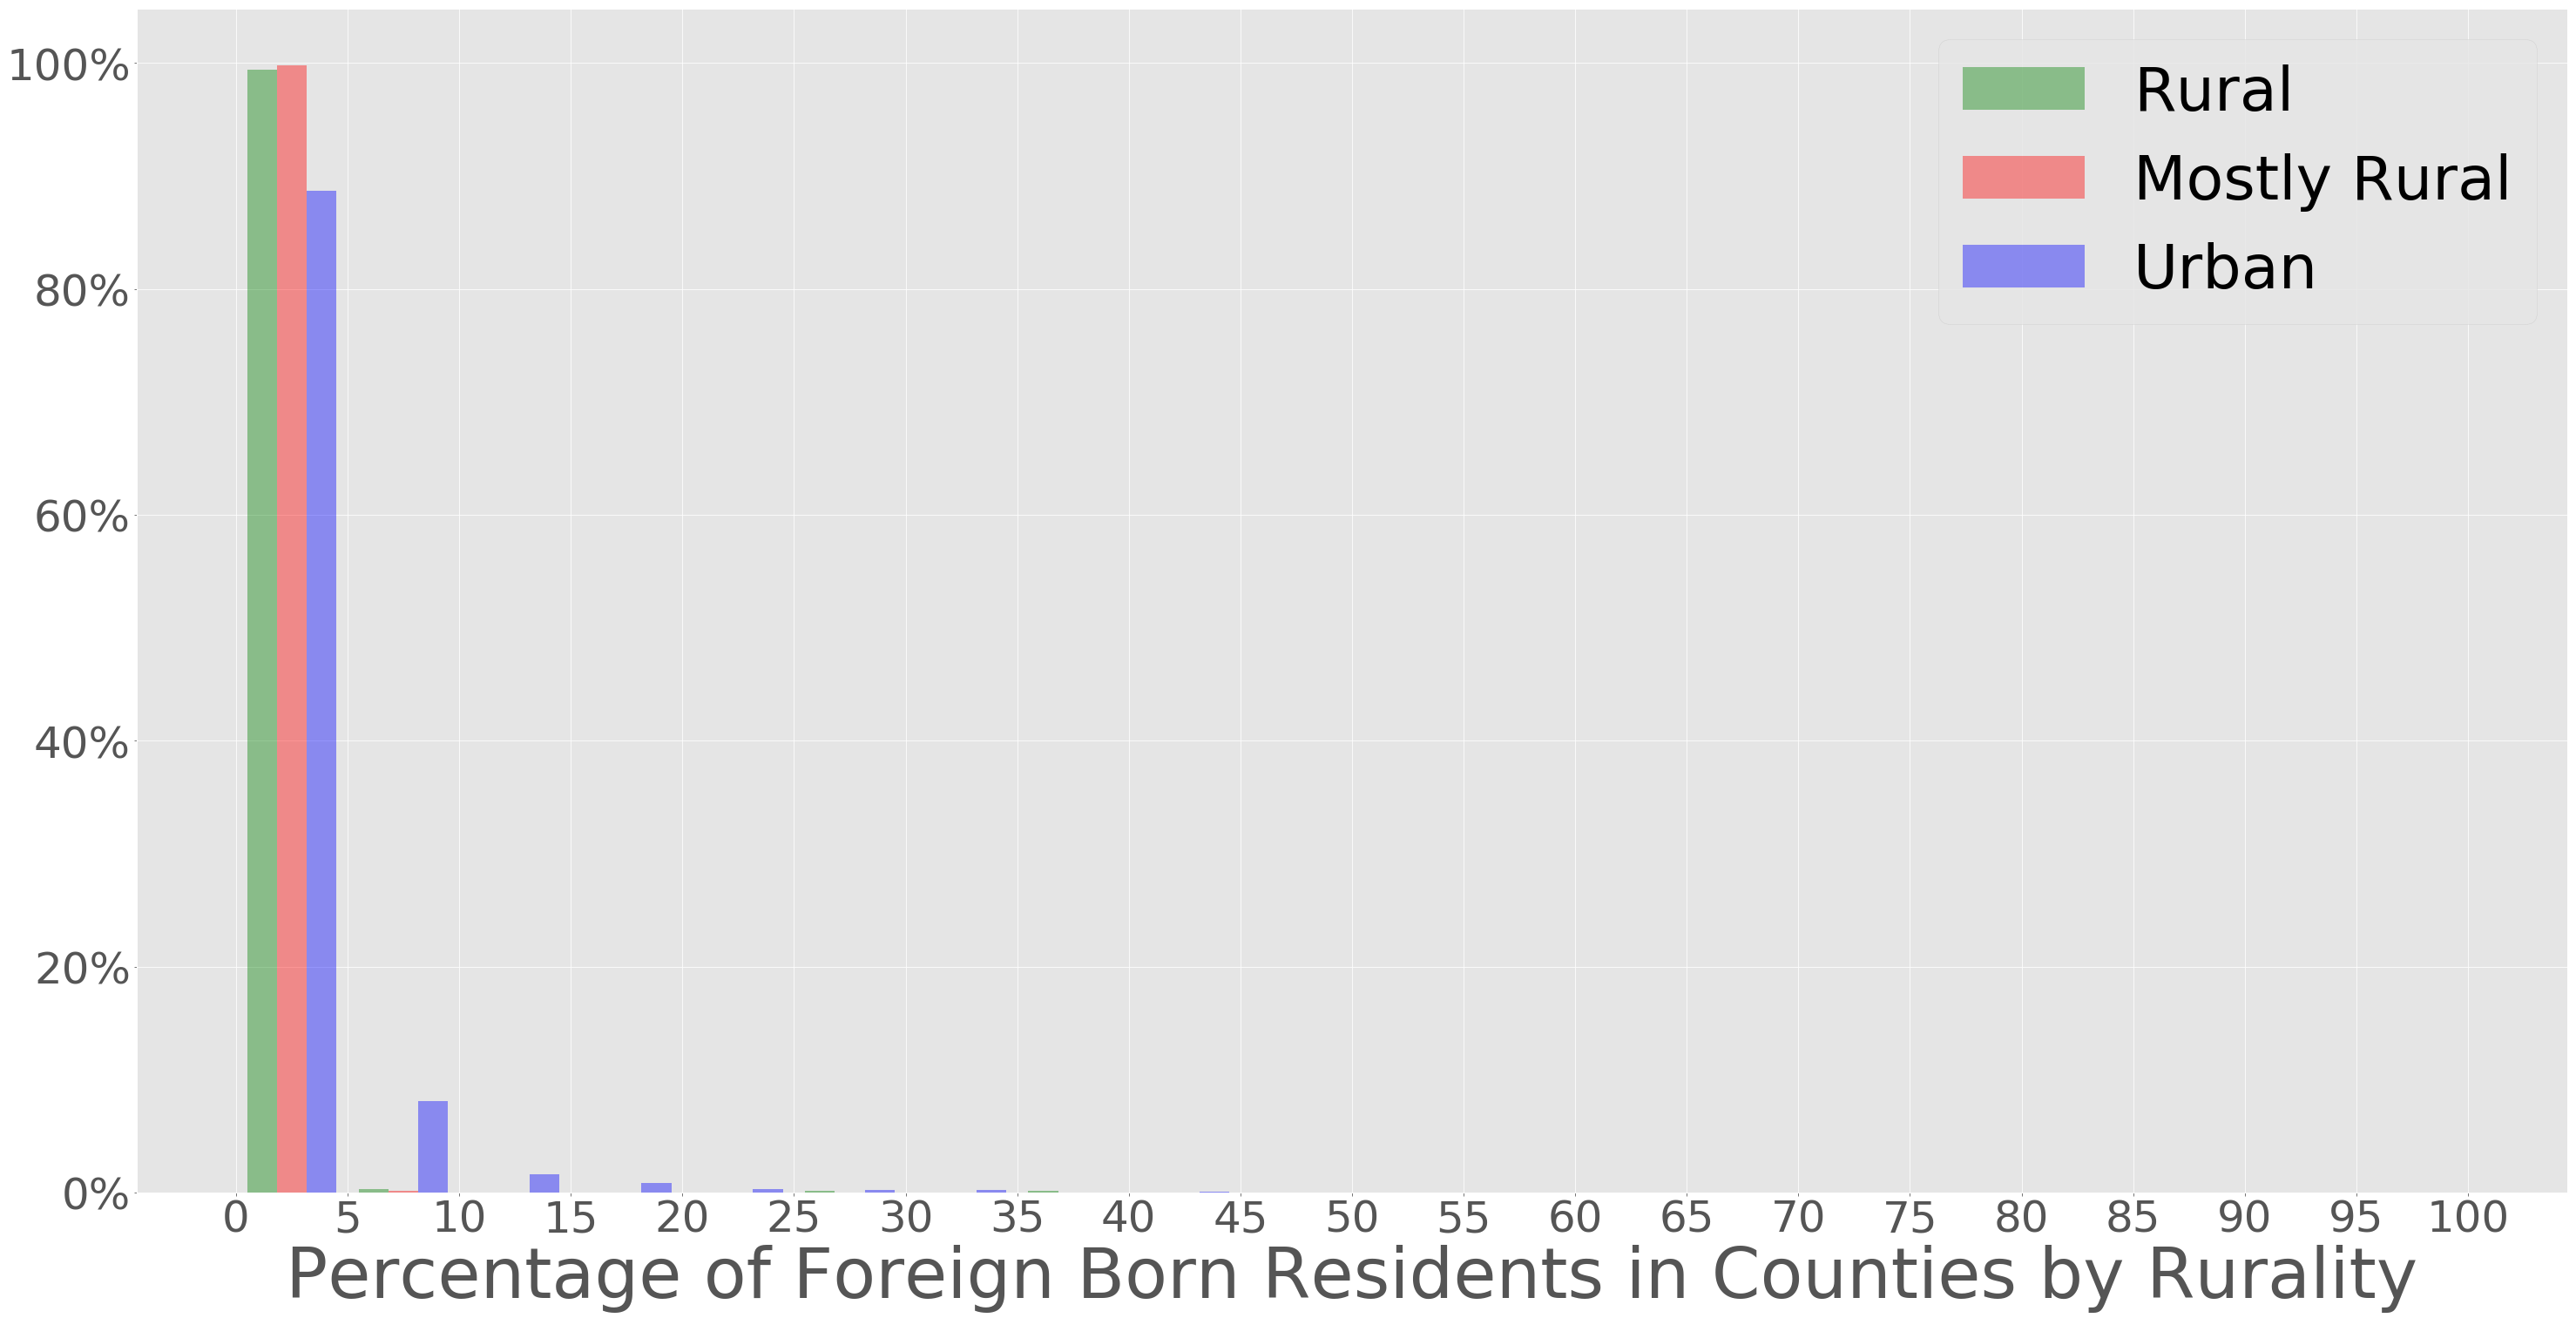

In [14]:
r_as = 100 * rural["Asian"]/ rural["Population"]
m_as = 100 *mrural["Asian"]/ mrural["Population"]
u_as = 100 * urban["Asian"]/ urban["Population"]
fig, ax = plt.subplots(figsize=(50, 25) ,sharex = True )

mbin = [i *5 for i in range(0,21)]

plt.xticks( mbin,fontsize=30)
ax.yaxis.set_major_formatter(PercentFormatter())


plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
 # labels along the bottom edge are off
#sns.set(font_scale=3)
sns.distplot([r_as,m_as,u_as],hist=True,  kde= False, bins =mbin, ax=ax, color=['green',"red",'blue',] , label=['Rural','Mostly Rural',"Urban"], hist_kws={ "weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as)),100 * np.ones_like(u_as)/float(len(u_as))]})
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 70})

plt.xlabel('Percentage of Foreign Born Residents in Counties by Rurality', fontsize=80)
plt.show()

In [15]:
rural.ix[rural['Black'].idxmax()]

c:\users\gabriel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


geo_id                                                    37185
Median Age                                                 46.5
Median Age ME                                               0.4
Population                                                20324
White                                                      7727
Black                                                     10235
Native American                                             949
Asian                                                       104
Native Hawaiian                                               0
Other                                                        18
Multiple                                                    498
Hispanic                                                    793
Foreign Born                                                663
Foreign Born ME                                             157
Child Poverty Ratio                                        3608
total_ed                                

No handles with labels found to put in legend.
c:\users\gabriel\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


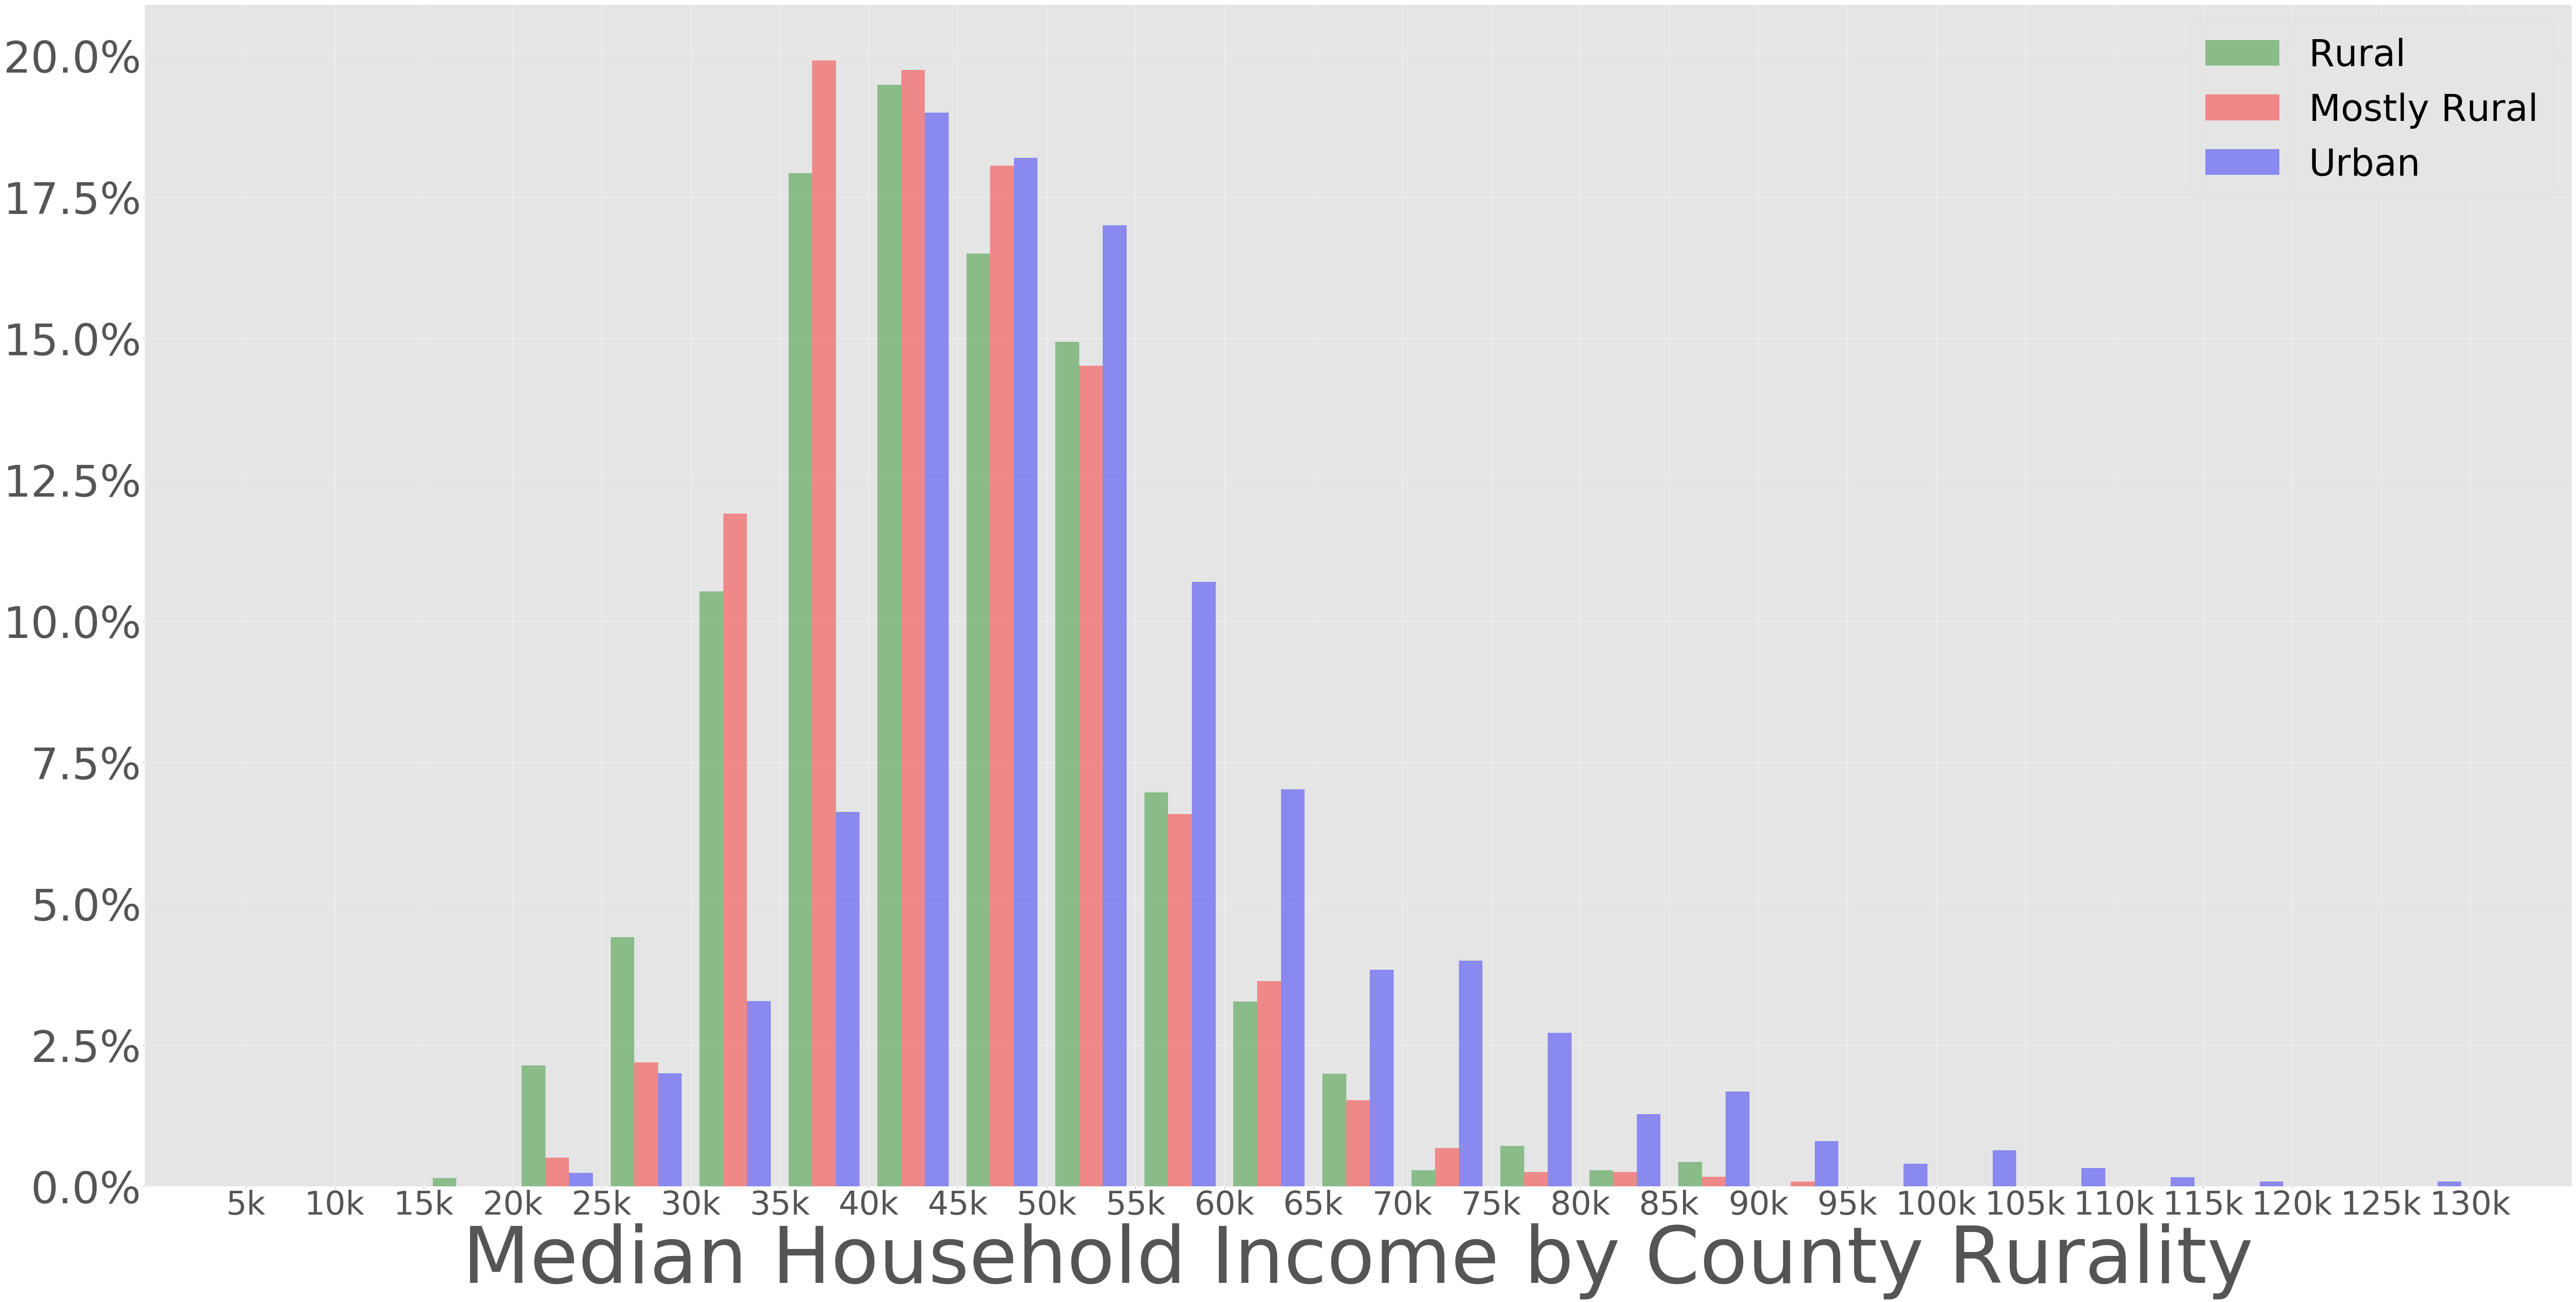

In [175]:
r_as = rural["Median Household Income"]
m_as = mrural["Median Household Income"]
u_as = urban["Median Household Income"]
mlabels = [str(i *5)+"k" for i in range(1,27)]

fig, ax = plt.subplots(figsize=(100, 50) ,sharex = True )
ax.legend(loc=1, prop={'size': 70})

ax.yaxis.set_major_formatter(PercentFormatter())



mbins = [i * 5000 for i in range(1,27)]
plt.xticks( mbins,fontsize=35)
plt.xticks(fontsize =75)
plt.yticks(fontsize = 100)
plt.xlabel('Median Household Income by County Rurality', fontsize=180)
ax.set_xticklabels(mlabels)



sns.distplot([r_as,m_as,u_as],hist=True, kde= False, bins =mbins, ax=ax, color=['green',"red",'blue',] , label=['Rural','Mostly Rural',"Urban"], hist_kws={"weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as)),100 * np.ones_like(u_as)/float(len(u_as))]})
 # labels along the bottom edge are off
#sns.set(font_scale=3)
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 85})



plt.show()

In [44]:
rural.columns

Index(['geo_id', 'Median Age', 'Median Age ME', 'Population', 'White', 'Black',
       'Native American', 'Asian', 'Native Hawaiian', 'Other', 'Multiple',
       'Hispanic', 'Foreign Born', 'Foreign Born ME', 'Child Poverty Ratio',
       'total_ed', 'below_hs', 'hs_grad', 'some_college', 'bachelor_deg',
       'graduate_deg', 'Poor', 'agg_travel_time', 'work_time', 'under5',
       'five', 'ten', 'fifteen', 'twenty', 'twenty5', 'thirty', 'thirty5',
       'fourty', 'fourty5', 'sixty', 'ninety', 'h_above_poverty',
       'Median Household Income', 'acs_laborf', 'acs_unemployed', 'Name',
       'County', 'State', 'under_18', 'LAUS Code', 'S_Code', 'Code',
       'County Name/State Abbreviation', 'Period', 'Force', 'Employed',
       'Unemployed', 'unemployment_rate', 'fbp'],
      dtype='object')

In [46]:
urban['work_time'].sum()

122506553

In [183]:
times = ['under5','five', 'ten', 'fifteen', 'twenty', 'twenty5', 'thirty', 'thirty5', 'fourty', 'fourty5', 'sixty', 'ninety']
times

['under5',
 'five',
 'ten',
 'fifteen',
 'twenty',
 'twenty5',
 'thirty',
 'thirty5',
 'fourty',
 'fourty5',
 'sixty',
 'ninety']

In [184]:

def get_perc(times,total,df):
    portions = []
    for i in times:
        portions.append(100 * df[i].sum()/df[total].sum())
    return portions
rural_t = get_perc(times,"work_time",rural)
mrural_t = get_perc(times,"work_time",mrural)
urban_t = get_perc(times,"work_time",urban)


rural_t
    

[10.109249832445027,
 15.095207129863084,
 11.646117910828838,
 11.307267896466984,
 10.448797992531835,
 5.0988075671017778,
 11.608318306577729,
 2.9250809849040946,
 3.6025815434206745,
 8.7519548080298719,
 6.2154417866147513,
 3.1911742412153319]

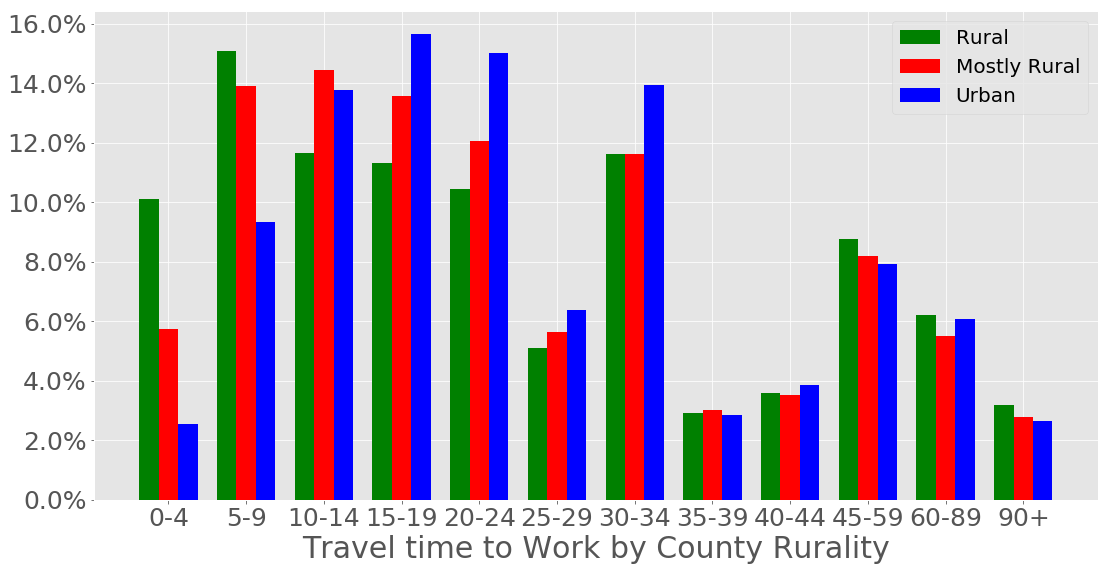

In [185]:

ind = np.arange(12)
times = ['under5','five', 'ten', 'fifteen', 'twenty', 'twenty5', 'thirty', 'thirty5', 'fourty', 'fourty5', 'sixty', 'ninety']

rural_t = get_perc(times,"work_time",rural) 
mrural_t = get_perc(times,"work_time",mrural) 
urban_t = get_perc(times,"work_time",urban) 
data = [rural_t,mrural_t,urban_t]

times = ['0-4','5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-59', '60-89', '90+']
f, ax = plt.subplots(figsize=(18,9))

X = np.arange(12)
plt.bar(X + 0.00, data[0], color = 'g', width = 0.25,label="Rural")
plt.bar(X + 0.25, data[1], color = 'r', width = 0.25, tick_label = times,align = "center",label="Mostly Rural")
plt.bar(X + 0.50, data[2], color = 'b', width = 0.25,label="Urban" )
plt.xticks(fontsize =25)
plt.yticks(fontsize =25)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.xlabel('Travel time to Work by County Rurality', fontsize=30)
ax.legend(loc=1, prop={'size': 20})


plt.show()



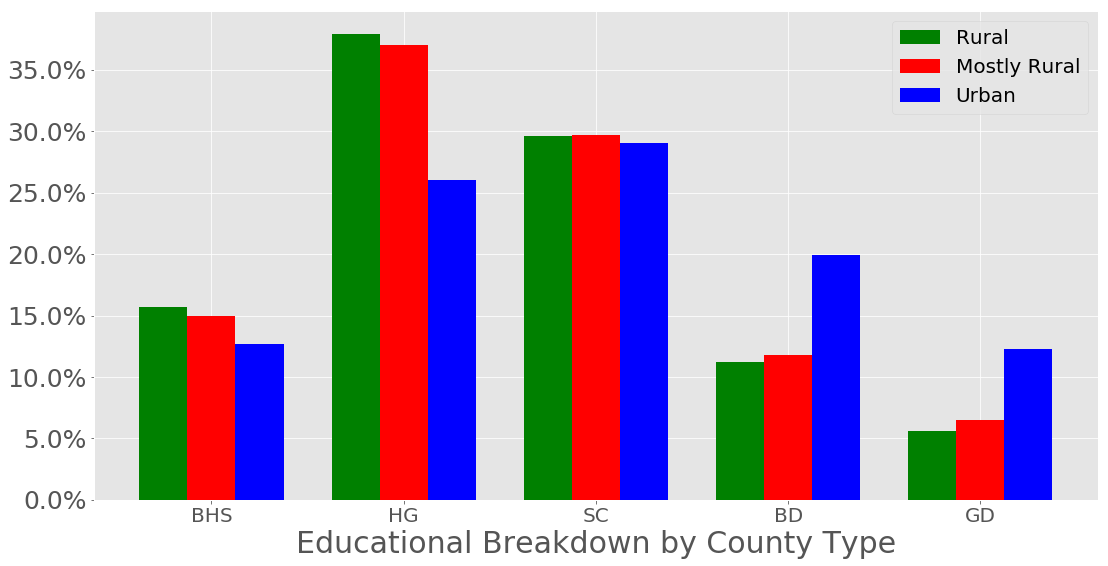

In [186]:

X = np.arange(5)
ed = ['below_hs', 'hs_grad', 'some_college', 'bachelor_deg',
       'graduate_deg']
rural_t = get_perc(ed,"total_ed",rural) 
mrural_t = get_perc(ed,"total_ed",mrural) 
urban_t = get_perc(ed,"total_ed",urban) 
data = [rural_t,mrural_t,urban_t]

times = ['BHS','HG','SC','BD','GD']
f, ax = plt.subplots(figsize=(18,9))


plt.bar(X + 0.00, data[0], color = 'g', width = 0.25,label="Rural")
plt.bar(X + 0.25, data[1], color = 'r', width = 0.25, tick_label = times,align = "center",label="Mostly Rural")
plt.bar(X + 0.50, data[2], color = 'b', width = 0.25,label="Urban" )
plt.xticks(fontsize =20)
plt.yticks(fontsize =25)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.xlabel('Educational Breakdown by County Type', fontsize=30)
ax.legend(loc=1, prop={'size': 20})


plt.show()



No handles with labels found to put in legend.
c:\users\gabriel\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


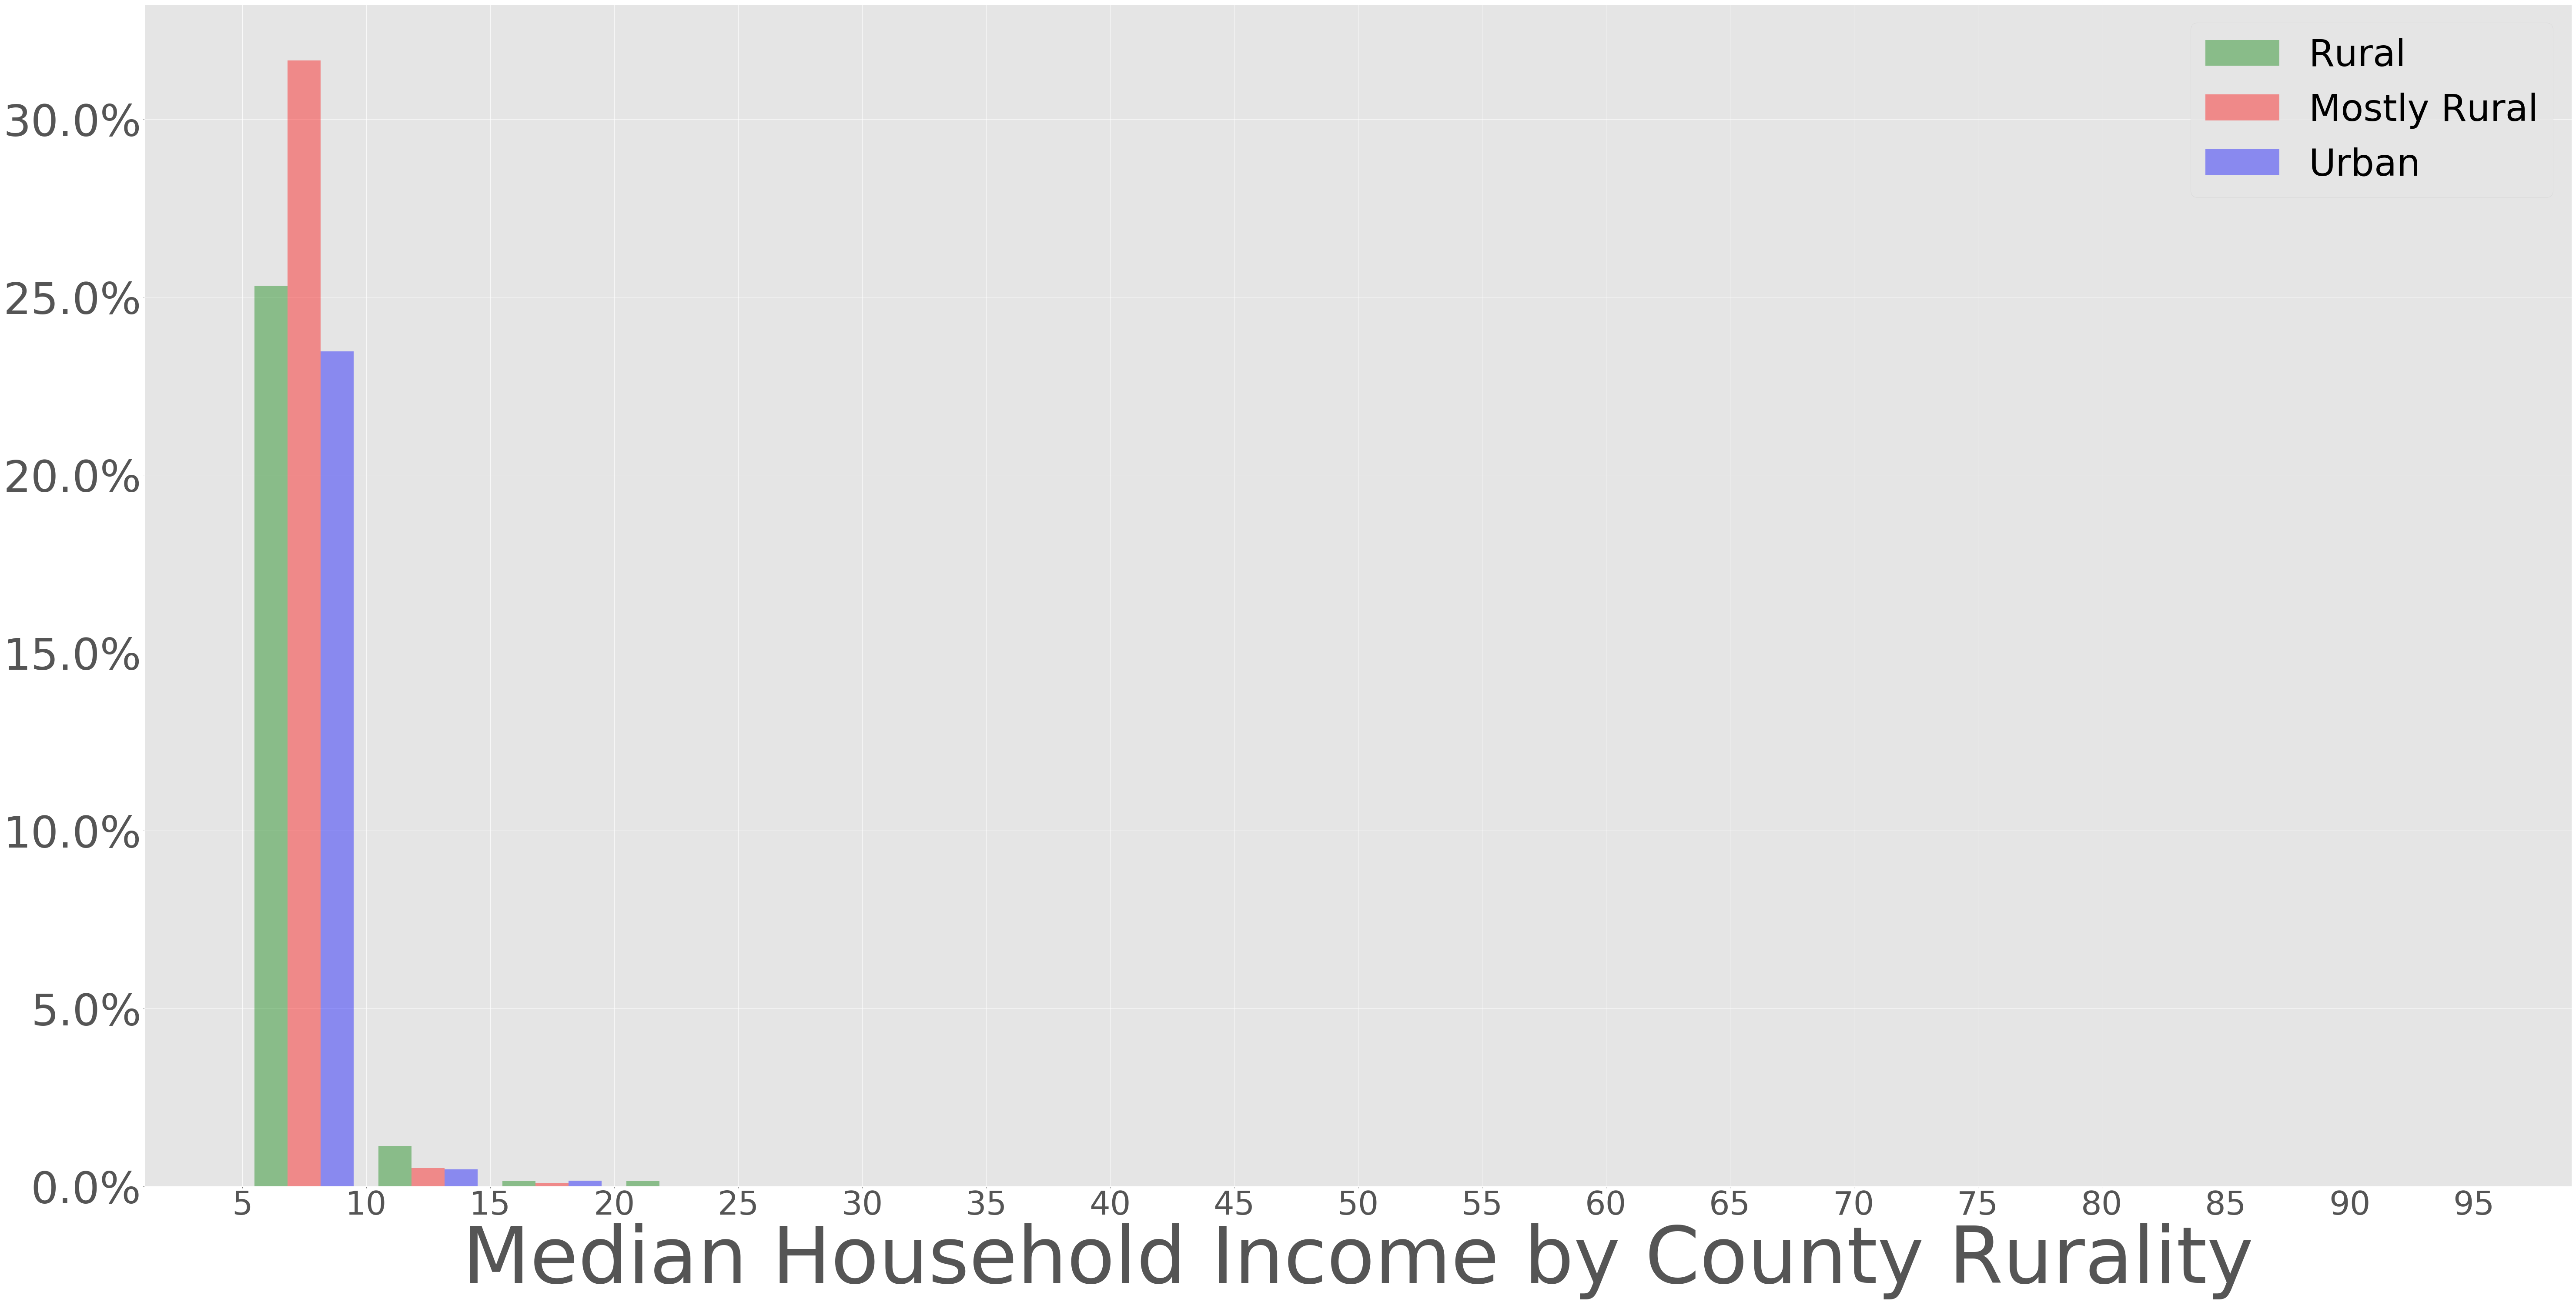

In [201]:
r_as = rural["unemployment_rate"] 
m_as = mrural["unemployment_rate"] 
u_as = urban["unemployment_rate"] 
mlabels = [str(i *5)+"k" for i in range(1,27)]

fig, ax = plt.subplots(figsize=(100, 50) ,sharex = True )
ax.legend(loc=1, prop={'size': 70})

ax.yaxis.set_major_formatter(PercentFormatter())



mbins = [i*5 for i in range(1,20)]
plt.xticks( mbins,fontsize=35)
plt.xticks(fontsize =75)
plt.yticks(fontsize = 100)
plt.xlabel('Median Household Income by County Rurality', fontsize=180)
#ax.set_xticklabels(mlabels)



sns.distplot([r_as,m_as,u_as],hist=True, kde= False, bins =mbins, ax=ax, color=['green',"red",'blue',] , label=['Rural','Mostly Rural',"Urban"], hist_kws={"weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as)),100 * np.ones_like(u_as)/float(len(u_as))]})
 # labels along the bottom edge are off
#sns.set(font_scale=3)
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 85})



plt.show()

In [199]:
rural["unemployment_rate"].max()

22.899999999999999